In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/My Drive/Colab Notebooks'
# !pwd

In [2]:
#!unzip '/content/drive/My Drive/Colab Notebooks/hnp_stats_csv.zip'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
raw_data = pd.read_csv('hnp_stats_csv/HNP_StatsData.csv')

In [5]:
raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,134.772341,135.343859,136.030214,135.898025,135.721826,135.387563,...,49.866891,49.790826,49.344963,48.853665,48.279737,47.505489,46.688851,NaN,NaN,NaN
1,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_data.keys()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [7]:
# raw_data['Country Code'].unique()

In [8]:
countries = raw_data.loc[:, ['Country Name', 'Country Code']].drop_duplicates().reset_index(drop=True)
countries_dict = {}
for i in range(len(countries)):
    countries_dict[countries.iloc[i, 1]] = countries.iloc[i, 0]
    print(countries.iloc[i, 1], ': ', countries.iloc[i, 0])
# print(countries_dict)

ARB :  Arab World
CSS :  Caribbean small states
CEB :  Central Europe and the Baltics
EAR :  Early-demographic dividend
EAS :  East Asia & Pacific
EAP :  East Asia & Pacific (excluding high income)
TEA :  East Asia & Pacific (IDA & IBRD countries)
EMU :  Euro area
ECS :  Europe & Central Asia
ECA :  Europe & Central Asia (excluding high income)
TEC :  Europe & Central Asia (IDA & IBRD countries)
EUU :  European Union
FCS :  Fragile and conflict affected situations
HPC :  Heavily indebted poor countries (HIPC)
HIC :  High income
LTE :  Late-demographic dividend
LCN :  Latin America & Caribbean
LAC :  Latin America & Caribbean (excluding high income)
TLA :  Latin America & the Caribbean (IDA & IBRD countries)
LDC :  Least developed countries: UN classification
LMY :  Low & middle income
LIC :  Low income
LMC :  Lower middle income
MEA :  Middle East & North Africa
MNA :  Middle East & North Africa (excluding high income)
TMN :  Middle East & North Africa (IDA & IBRD countries)
MIC :  Mid

In [9]:
def population_pyramid(country_code, year, raw_data=None, save_path=None, data_path='hnp_stats_csv/HNP_StatsData.csv'):
    if type(raw_data) == type(None):
        raw_data = pd.read_csv(data_path)
    pop_indicator_m = ['SP.POP.0004.MA.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.MA.5Y', 'SP.POP.1519.MA.5Y', 'SP.POP.2024.MA.5Y', 'SP.POP.2529.MA.5Y', 
                       'SP.POP.3034.MA.5Y', 'SP.POP.3539.MA.5Y', 'SP.POP.4044.MA.5Y', 'SP.POP.4549.MA.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.MA.5Y', 
                       'SP.POP.6064.MA.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.7074.MA.5Y', 'SP.POP.7579.MA.5Y', 'SP.POP.80UP.MA.5Y']
    pop_indicator_f = ['SP.POP.0004.FE.5Y', 'SP.POP.0509.FE.5Y', 'SP.POP.1014.FE.5Y', 'SP.POP.1519.FE.5Y', 'SP.POP.2024.FE.5Y', 'SP.POP.2529.FE.5Y',
                       'SP.POP.3034.FE.5Y', 'SP.POP.3539.FE.5Y', 'SP.POP.4044.FE.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.5054.FE.5Y', 'SP.POP.5559.FE.5Y', 
                       'SP.POP.6064.FE.5Y', 'SP.POP.6569.FE.5Y', 'SP.POP.7074.FE.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.80UP.FE.5Y']
    df_pop_m = raw_data[(raw_data['Country Code'] == country_code) & (raw_data['Indicator Code'].isin(pop_indicator_m))].reset_index(drop=True)
    df_pop_f = raw_data[(raw_data['Country Code'] == country_code) & (raw_data['Indicator Code'].isin(pop_indicator_f))].reset_index(drop=True)
    plt.cla()
    year = str(year)
    df_mf = pd.DataFrame(data={'Age': ['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                                       '60-64', '65-69', '70-74', '75-79', '80-up']}, index=range(17), columns=['Age', 'M', 'F'])
    df_mf['M'] = df_pop_m.loc[:,[year]]
    df_mf['F'] = df_pop_f.loc[:,[year]] * -1
    sns.set_style('white')
    bar_plot = sns.barplot(y = 'Age', x = 'F', color = 'red', data = df_mf, 
                           order = ['80-up', '70-74', '75-79', '65-69', '60-64',
                                    '55-59', '50-54', '45-49', '40-44', '35-39',
                                    '30-34', '25-29', '20-24', '15-19', '10-14',
                                    '05-09', '00-04'])
    bar_plot = sns.barplot(y = 'Age', x = 'M', color = 'blue', data = df_mf, 
                           order = ['80-up', '70-74', '75-79', '65-69', '60-64',
                                    '55-59', '50-54', '45-49', '40-44', '35-39',
                                    '30-34', '25-29', '20-24', '15-19', '10-14',
                                    '05-09', '00-04'])
    bar_plot.set(xlabel='Percentage (red: female; blue: male)', 
                 ylabel='Age Group', 
                 title = 'Population Pyramid - '+country_code+' - ' + year)
    if save_path != None:
        plt.savefig('pop_prmd_'+country_code+'_'+year+'.png')
        

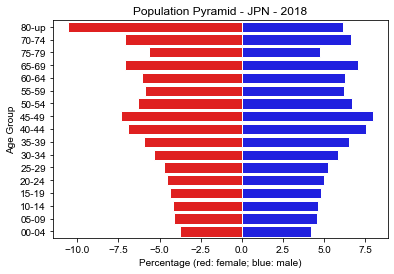

In [10]:
population_pyramid('JPN', '2018', raw_data)

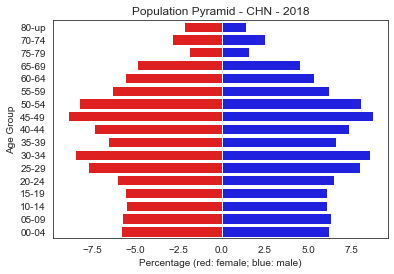

In [11]:
population_pyramid('CHN', '2018', raw_data)

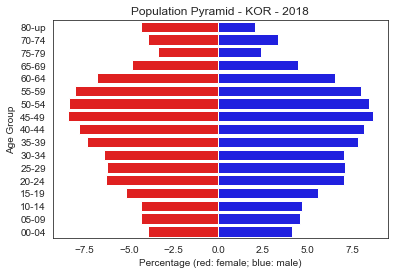

In [12]:
population_pyramid('KOR', '2018', raw_data)

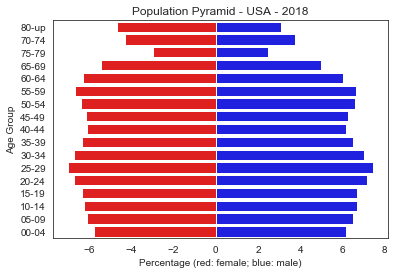

In [13]:
population_pyramid('USA', '2018', raw_data)

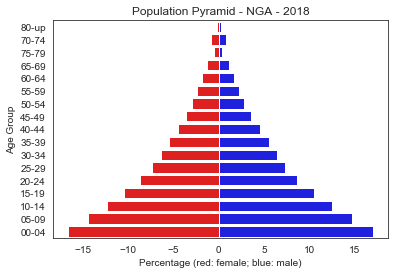

In [14]:
population_pyramid('NGA', '2018', raw_data)